# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 614
['hermanus', 'puerto natales', 'praia', 'bilibino', 'bethel', 'port-aux-francais', 'midvagur', 'adamstown', 'alnashi', 'tiksi', 'serenje', 'tionk essil', 'edinburgh of the seven seas', 'ust-kamenogorsk', 'mount pearl', 'longyearbyen', 'jinsha', 'novo aripuana', 'taiohae', 'ushuaia', 'kerikeri', 'somero', 'powell', 'isafjordur', 'iqaluit', 'las heras', 'alice springs', 'uturoa', 'papatowai', 'queenstown', 'rongelap', 'jamestown', 'midland', 'grytviken', 'port augusta', 'pangody', 'san patricio', 'ilulissat', 'port elizabeth', 'igarka', 'hawaiian paradise park', 'ust-nera', 'mhamid', 'abingdon', 'bredasdorp', 'sayalkudi', 'susuman', 'tranas', 'waitangi', 'kaa-khem', 'kailua-kona', "mil'kovo", 'jumla', 'puerto san carlos', 'vondrozo', 'yellowknife', 'lorengau', 'argo', 'punta arenas', 'palanga', 'vilyuchinsk', 'badger', 'blackmans bay', 'nova sintra', 'stanley', 'sanming', 'san antonio de pale', 'kodiak', 'lihue', 'kupang', 'quellon', 'cabedelo', 'guerrer

In [ ]:
---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL_
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
#query_url = f"{url}appid={weather_api_key}


    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+ "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_humidity= city_weather["main"]["humidity"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | praia
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | midvagur
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | alnashi
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | serenje
Processing Record 12 of Set 1 | tionk essil
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | ust-kamenogorsk
Processing Record 15 of Set 1 | mount pearl
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | jinsha
Processing Record 18 of Set 1 | novo aripuana
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | kerikeri
Processing Record

Processing Record 39 of Set 4 | tromso
Processing Record 40 of Set 4 | temiskaming shores
Processing Record 41 of Set 4 | el nido
Processing Record 42 of Set 4 | liaozhong
Processing Record 43 of Set 4 | howard springs
Processing Record 44 of Set 4 | nyurba
Processing Record 45 of Set 4 | torrejon de la calzada
Processing Record 46 of Set 4 | minas de marcona
Processing Record 47 of Set 4 | lodja
Processing Record 48 of Set 4 | twentynine palms
Processing Record 49 of Set 4 | klaksvik
Processing Record 0 of Set 5 | mount isa
Processing Record 1 of Set 5 | kone
Processing Record 2 of Set 5 | bomdila
Processing Record 3 of Set 5 | bethlehem
Processing Record 4 of Set 5 | nouadhibou
Processing Record 5 of Set 5 | oran
Processing Record 6 of Set 5 | carnarvon
Processing Record 7 of Set 5 | mandla
Processing Record 8 of Set 5 | afaahiti
Processing Record 9 of Set 5 | urkarakh
Processing Record 10 of Set 5 | college
Processing Record 11 of Set 5 | dalbandin
Processing Record 12 of Set 5 | to

Processing Record 33 of Set 8 | talakan
Processing Record 34 of Set 8 | springs
Processing Record 35 of Set 8 | tofol
Processing Record 36 of Set 8 | puerto deseado
Processing Record 37 of Set 8 | sant antoni de portmany
Processing Record 38 of Set 8 | ondjiva
Processing Record 39 of Set 8 | prince rupert
Processing Record 40 of Set 8 | tekirova
Processing Record 41 of Set 8 | bridgewater
Processing Record 42 of Set 8 | chizhou
Processing Record 43 of Set 8 | kyshtovka
Processing Record 44 of Set 8 | nar'yan-mar
Processing Record 45 of Set 8 | tanki leendert
City not found. Skipping...
Processing Record 46 of Set 8 | ekpoma
Processing Record 47 of Set 8 | bogandinskiy
Processing Record 48 of Set 8 | rabo de peixe
Processing Record 49 of Set 8 | saudarkrokur
Processing Record 0 of Set 9 | skeldon
Processing Record 1 of Set 9 | floro
Processing Record 2 of Set 9 | dakhla
Processing Record 3 of Set 9 | meadow lake
Processing Record 4 of Set 9 | bonthe
Processing Record 5 of Set 9 | khash


Processing Record 21 of Set 12 | covington
Processing Record 22 of Set 12 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 23 of Set 12 | sant lluis
Processing Record 24 of Set 12 | alotau
City not found. Skipping...
Processing Record 25 of Set 12 | alenquer
Processing Record 26 of Set 12 | athens
Processing Record 27 of Set 12 | ceeldheer
Processing Record 28 of Set 12 | paphos
Processing Record 29 of Set 12 | santo antonio
Processing Record 30 of Set 12 | murun-kuren
Processing Record 31 of Set 12 | gornyatskiy
Processing Record 32 of Set 12 | colonia
Processing Record 33 of Set 12 | orchard homes
Processing Record 34 of Set 12 | newman
Processing Record 35 of Set 12 | pajapan
Processing Record 36 of Set 12 | fort-shevchenko
Processing Record 37 of Set 12 | tacuarembo
Processing Record 38 of Set 12 | cienaga
Processing Record 39 of Set 12 | muhoroni
Processing Record 40 of Set 12 | miri
Processing Record 41 of Set 12 | bure
Processing Record 42 of Set 12 | dul'durga
Proce

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,32.67,52,0,3.24,ZA,1708358997
1,puerto natales,-51.7236,-72.4875,14.25,88,100,6.17,CL,1708358997
2,praia,14.9215,-23.5087,25.89,61,0,6.50,CV,1708358997
3,bilibino,68.0546,166.4372,-26.58,73,42,3.13,RU,1708358997
4,bethel,41.3712,-73.4140,3.34,50,0,7.20,US,1708358963


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("outputdata/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("outputdata/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,32.67,52,0,3.24,ZA,1708358997
1,puerto natales,-51.7236,-72.4875,14.25,88,100,6.17,CL,1708358997
2,praia,14.9215,-23.5087,25.89,61,0,6.50,CV,1708358997
3,bilibino,68.0546,166.4372,-26.58,73,42,3.13,RU,1708358997
4,bethel,41.3712,-73.4140,3.34,50,0,7.20,US,1708358963


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

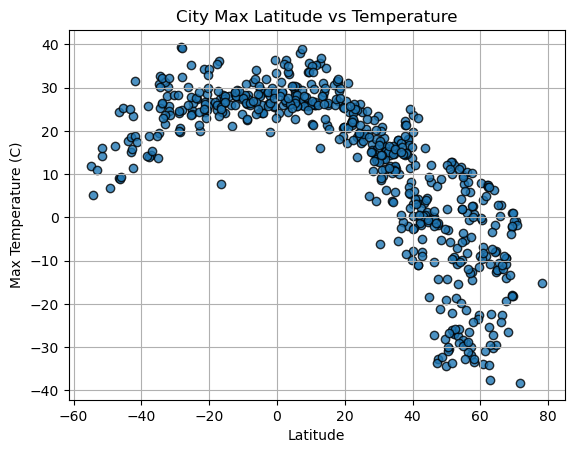

In [47]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolor="black", marker = "o", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("outputdata/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

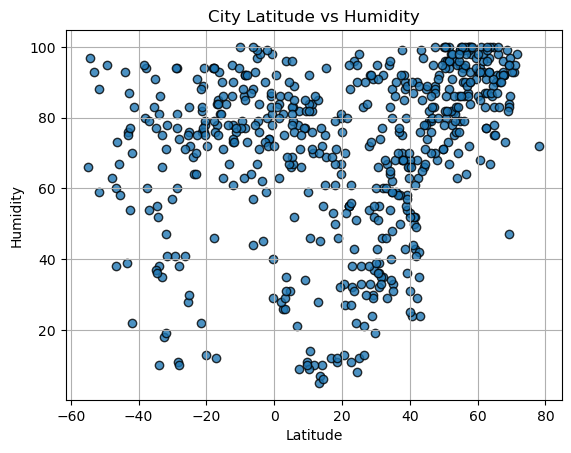

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolor="black", marker = "o", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("outputdata/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

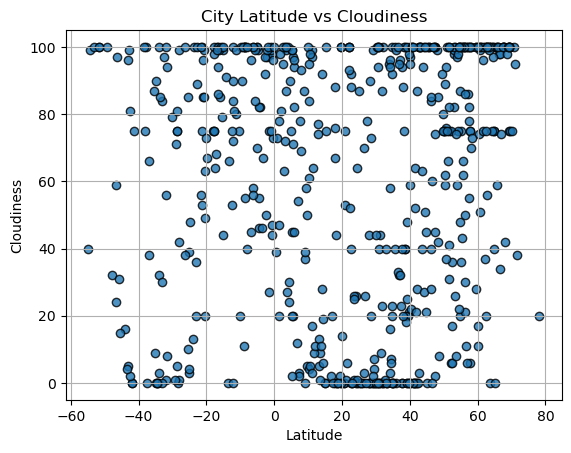

In [49]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolor="black", marker = "o", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("outputdata/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

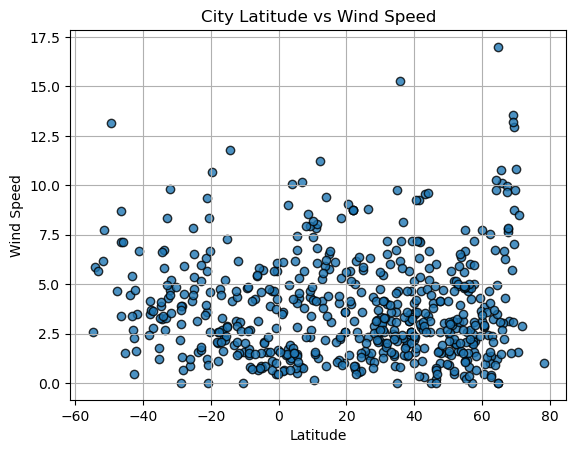

In [50]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolor="black", marker = "o", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("outputdata/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def lin_regress(x_values,y_values,title,text_coord):
    
    (slope, intercept, rvalue,pvalue,stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope +intercept
    eq_line = "y =" + str(round(slope,2)) + "x +" +str(round(intercept,2))
    
    #plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values, color = "red")
    plt.annotate(eq_line,text_coord,color = "red",fontsize = 15)
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"the r value is {rvalue**2}")
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,praia,14.9215,-23.5087,25.89,61,0,6.50,CV,1708358997
3,bilibino,68.0546,166.4372,-26.58,73,42,3.13,RU,1708358997
4,bethel,41.3712,-73.4140,3.34,50,0,7.20,US,1708358963
6,midvagur,62.0511,-7.1939,7.46,87,100,4.63,FO,1708358998
8,alnashi,56.1874,52.4792,-8.33,94,100,4.81,RU,1708358998


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,32.67,52,0,3.24,ZA,1708358997
1,puerto natales,-51.7236,-72.4875,14.25,88,100,6.17,CL,1708358997
5,port-aux-francais,-49.3500,70.2167,6.73,95,100,13.17,TF,1708358998
7,adamstown,-25.0660,-130.1015,24.95,83,39,4.73,PN,1708358998
10,serenje,-13.2325,30.2352,21.25,67,66,1.92,ZM,1708358998


###  Temperature vs. Latitude Linear Regression Plot

the r value is 0.6667753500329713


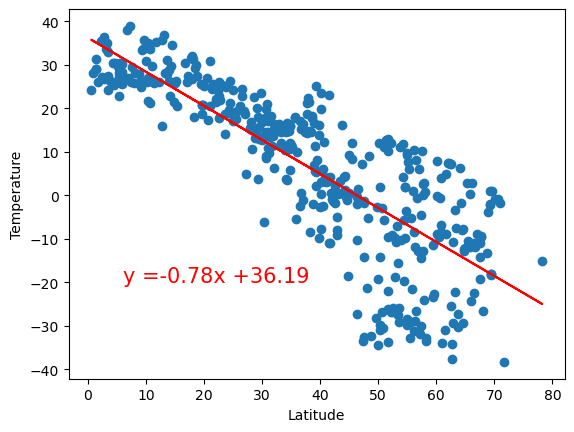

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Max Temp"]
title = "Temperature"
text_coord = (6,-20)
lin_regress(x_values,y_values,title,text_coord)

the r value is 0.2996381521961869


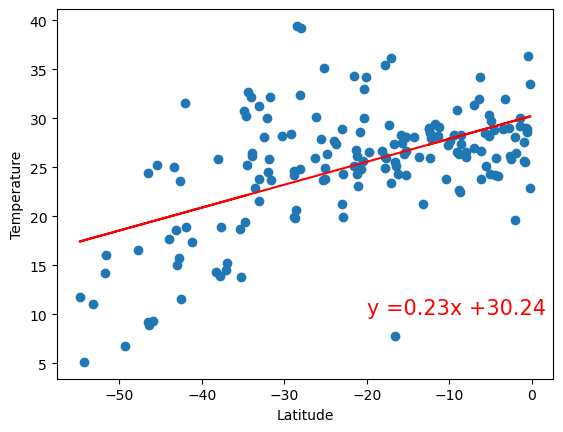

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Temperature"
text_coord = (-20,10)
lin_regress(x_values,y_values,title,text_coord)

**Discussion about the linear relationship:** As the latitude gets further away from zero, the temperature decreases. There is a strong negative relationshop between the northern hemisphere latitude and temperature, and a strong positive relationship between the southern hemisphere latitude and temperature. 

### Humidity vs. Latitude Linear Regression Plot

the r value is 0.23620544762087659


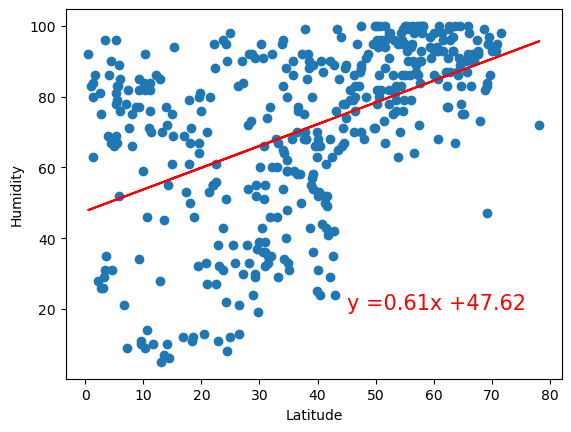

In [39]:
# Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Humidity"]
title = "Humidity"
text_coord = (45,20)
lin_regress(x_values,y_values,title,text_coord)

the r value is 0.049080423178640524


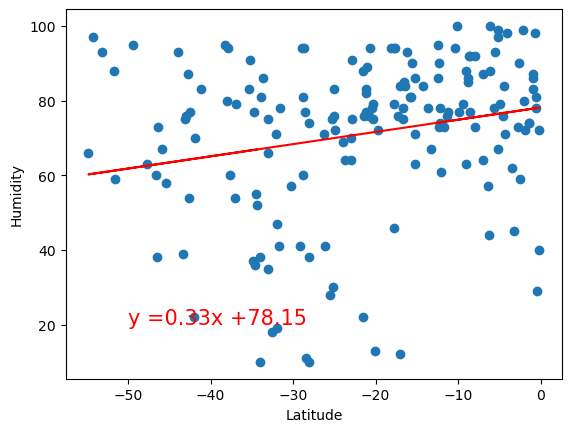

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "Humidity"
text_coord = (-50,20)
lin_regress(x_values,y_values,title,text_coord)

**Discussion about the linear relationship:** There is a moderate positive relationship between northern hemisphere latitude and humidity. The relationship for the southern hemisphere and latitude is a weak positive relationship. As you get closer to the equator, or latitude 0, the humidity increases

### Cloudiness vs. Latitude Linear Regression Plot

the r value is 0.0789162655416006


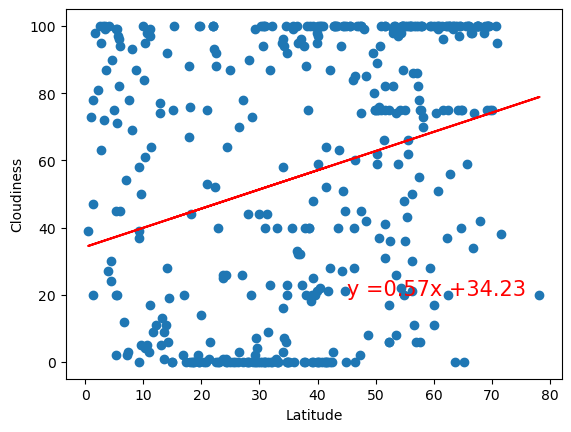

In [40]:
# Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Cloudiness"]
title = "Cloudiness"
text_coord = (45,20)
lin_regress(x_values,y_values,title,text_coord)

the r value is 0.08967847494316095


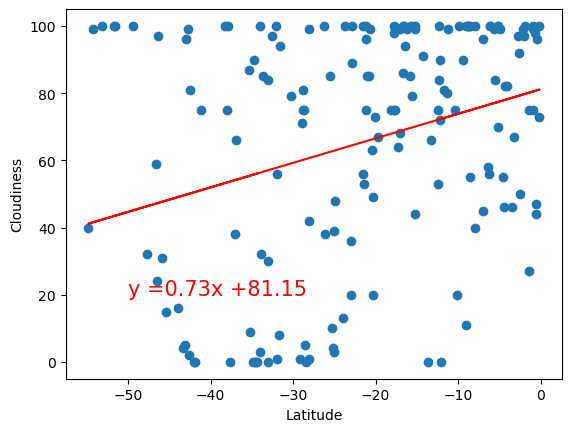

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Cloudiness"
text_coord = (-50,20)
lin_regress(x_values,y_values,title,text_coord)

**Discussion about the linear relationship:** Cloudiness is not strongly correlated with latitue. There is a weak positive relationship between cloudiness and latitude for both the northern and southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

the r value is 0.001989805537146285


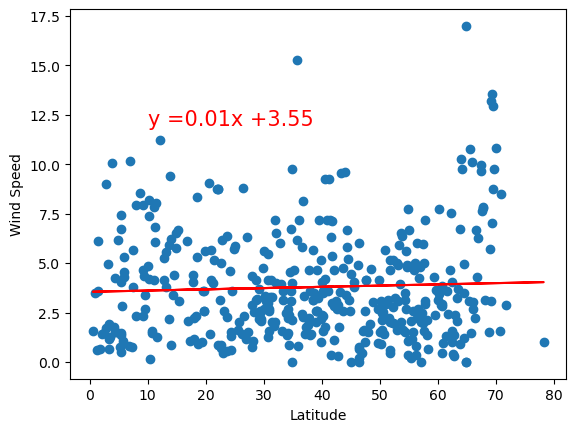

In [41]:
# Northern Hemisphere
x_values = northern_hemi["Lat"]
y_values = northern_hemi["Wind Speed"]
title = "Wind Speed"
text_coord = (10,12)
lin_regress(x_values,y_values,title,text_coord)

the r value is 0.08776978889183065


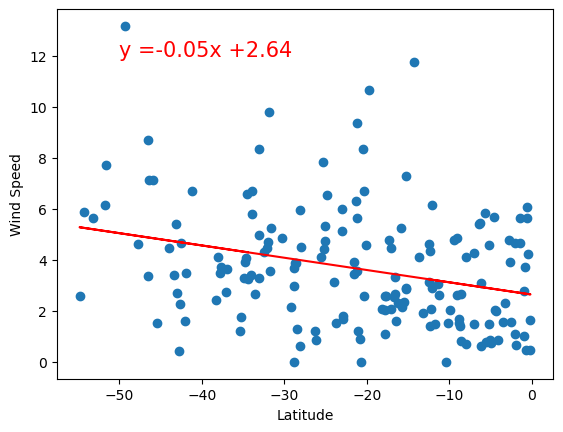

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = "Wind Speed"
text_coord = (-50,12)
lin_regress(x_values,y_values,title,text_coord)

**Discussion about the linear relationship:** Wind speed and latitude are not strongly correlated. There is no apparent relationhip between latitude and wind speed for the northern hemisphere and there is a slight negative relationship between latitude and wind speed for the southern hemisphere. Wind speed is more or less consistent around the globe